In [3]:
import warnings;
warnings.simplefilter('ignore')

In [18]:
from prophet import Prophet
print("Prophet is working!")

Prophet is working!


In [23]:
from prophet import Prophet
print("Prophet is working!")

Prophet is working!


In [24]:
from prophet import Prophet

In [25]:
import numpy as np
import pandas as pd
from prophet import Prophet

In [27]:
df=pd.read_csv('retail_sales.csv')

In [30]:
df

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000000
1,2012018,2667437,QLD_CW_ST0203,2687.531000
2,3012018,2667437,QLD_CW_ST0203,2793.000000
3,4012018,2667437,QLD_CW_ST0203,2394.000000
4,5012018,2667437,QLD_CW_ST0203,2660.000000
...,...,...,...,...
1075,12122020,2667437,QLD_CW_ST0203,3167.594500
1076,13122020,2667437,QLD_CW_ST0203,3167.594500
1077,14122020,2667437,QLD_CW_ST0203,3383.354511
1078,15122020,2667437,QLD_CW_ST0203,2714.591329


In [29]:
df.shape

(1080, 4)

In [31]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [33]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [ ]:
# In this case we need to reform Time Date from int56 to datetime format

In [37]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [ ]:
# Define a function to extract the year from the date
def extract_year(date):
    return str(date)[-4:]

# Apply the function to the 'Time Date' column and create a new 'Year' column
df['Year'] = df['Time Date'].apply(extract_year)

In [38]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [39]:
df.dtypes

Time Date             int64
Product               int64
Store                object
Value               float64
Year                 object
Month                object
Day                  object
ds           datetime64[ns]
dtype: object

In [40]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
# Next we gonna drop Product and Store columns because they are a unique values only same values

In [42]:
df.drop(['Time Date','Product','Store','Year','Month','Day'], axis=1,inplace=True)

In [44]:
df.columns=['y','ds']

In [45]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [50]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


# 2 Train model

In [46]:
m=Prophet(interval_width=0.95, daily_seasonality=True)
model=m.fit(df)

15:31:03 - cmdstanpy - INFO - Chain [1] start processing
15:31:07 - cmdstanpy - INFO - Chain [1] done processing


# 3. Forecast Away

In [47]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3042.594103,906.444026,3919.035386,3042.594103,3042.594103,-638.437544,-638.437544,-638.437544,472.141955,...,16.616741,16.616741,16.616741,-1127.196240,-1127.196240,-1127.196240,0.0,0.0,0.0,2404.156560
1,2018-01-02,3043.322464,859.085381,3938.550719,3043.322464,3043.322464,-648.635765,-648.635765,-648.635765,472.141955,...,-11.282714,-11.282714,-11.282714,-1109.495007,-1109.495007,-1109.495007,0.0,0.0,0.0,2394.686699
2,2018-01-03,3044.050824,811.579541,4036.026919,3044.050824,3044.050824,-622.870532,-622.870532,-622.870532,472.141955,...,-4.407308,-4.407308,-4.407308,-1090.605179,-1090.605179,-1090.605179,0.0,0.0,0.0,2421.180292
3,2018-01-04,3044.779185,872.579129,4232.490953,3044.779185,3044.779185,-575.980886,-575.980886,-575.980886,472.141955,...,22.479695,22.479695,22.479695,-1070.602537,-1070.602537,-1070.602537,0.0,0.0,0.0,2468.798298
4,2018-01-05,3045.507545,890.159780,4136.893996,3045.507545,3045.507545,-612.050581,-612.050581,-612.050581,472.141955,...,-34.576880,-34.576880,-34.576880,-1049.615656,-1049.615656,-1049.615656,0.0,0.0,0.0,2433.456964


In [49]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4233.955492,2058.100530,5275.939150,4230.037430,4237.669424,-511.103379,-511.103379,-511.103379,472.141955,...,16.616741,16.616741,16.616741,-999.862075,-999.862075,-999.862075,0.0,0.0,0.0,3722.852114
1176,2021-03-23,4235.029099,2146.508611,5273.484664,4231.068632,4238.807852,-528.550074,-528.550074,-528.550074,472.141955,...,-11.282714,-11.282714,-11.282714,-989.409315,-989.409315,-989.409315,0.0,0.0,0.0,3706.479026
1177,2021-03-24,4236.102707,2158.093335,5330.413334,4232.099483,4239.904115,-513.999140,-513.999140,-513.999140,472.141955,...,-4.407308,-4.407308,-4.407308,-981.733787,-981.733787,-981.733787,0.0,0.0,0.0,3722.103567
1178,2021-03-25,4237.176314,2221.551070,5382.798911,4233.113357,4241.021804,-482.796937,-482.796937,-482.796937,472.141955,...,22.479695,22.479695,22.479695,-977.418587,-977.418587,-977.418587,0.0,0.0,0.0,3754.379377
1179,2021-03-26,4238.249921,2079.742011,5185.433184,4234.095461,4242.185245,-539.396807,-539.396807,-539.396807,472.141955,...,-34.576880,-34.576880,-34.576880,-976.961882,-976.961882,-976.961882,0.0,0.0,0.0,3698.853114


In [52]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2404.156560
1,2018-01-02,2394.686699
2,2018-01-03,2421.180292
3,2018-01-04,2468.798298
4,2018-01-05,2433.456964
...,...,...
1175,2021-03-22,3722.852114
1176,2021-03-23,3706.479026
1177,2021-03-24,3722.103567
1178,2021-03-25,3754.379377


In [53]:
import matplotlib.pyplot as plt

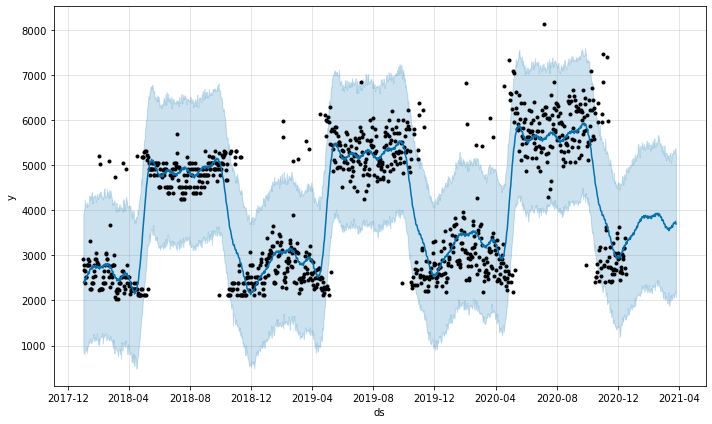

In [54]:
plot=m.plot(forecast)

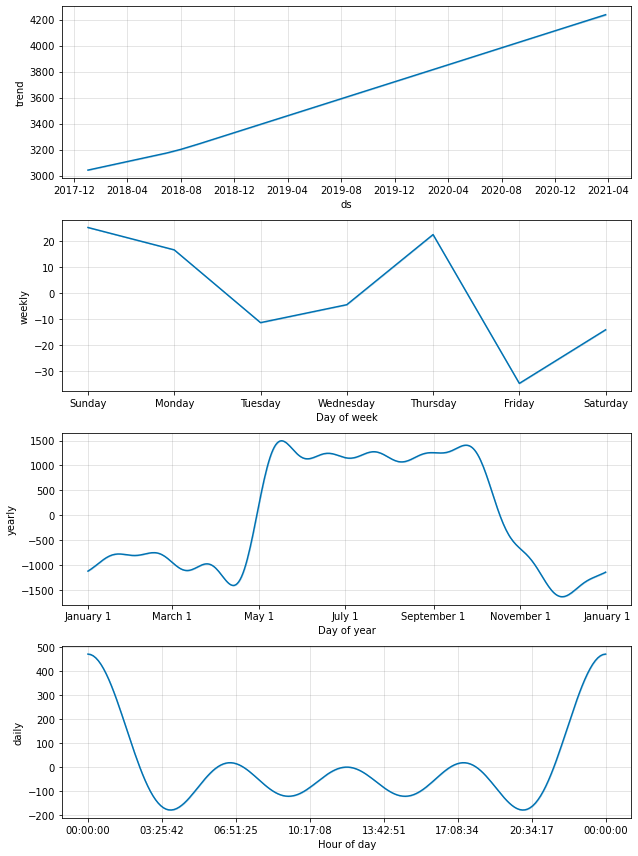

In [55]:
plot2=m.plot_components(forecast)

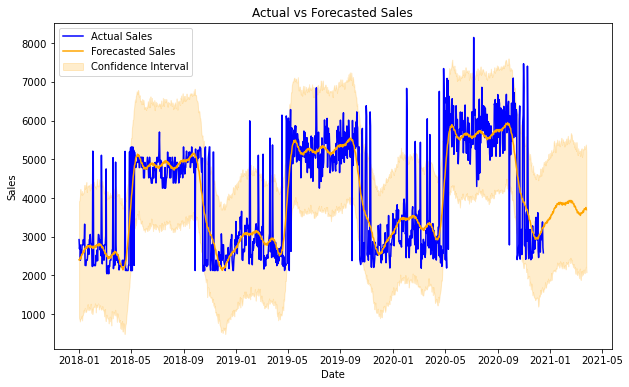

In [56]:
# Additional Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Actual Sales', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Sales', color='orange')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2, label='Confidence Interval')
plt.title("Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()